<div>
    <div style="float:left;width:70%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2022</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Tuesday, April 28 • 17:00 - 19:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://app.slack.com/client/T094HBB9T/C039C3J7Y1M">#t22-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://youtu.be/2Hu4gDnRzlU">https://youtu.be/2Hu4gDnRzlU</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

## Region-specific behaviour: the lake case

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook
import numpy as np
import pygimli as pg
from pygimli.physics import ert
print(pg.__version__)

1.3.1


### Data and geometry

The data was measured across a shallow lake with the most electrodes being on the bottom of the approx. 2.5m deep lake. We used cables with 2m spaced takeouts.

In [2]:
data = ert.load("data/lake.ohm")
print(data)

Data: Sensors: 48 data: 658, nonzero entries: ['a', 'b', 'err', 'i', 'm', 'n', 'r', 'u', 'valid']


The data set contains current and voltage.

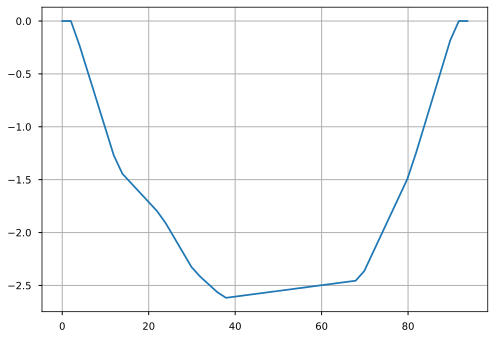

In [3]:
plt.plot(pg.x(data), pg.z(data), "x-")
plt.grid();

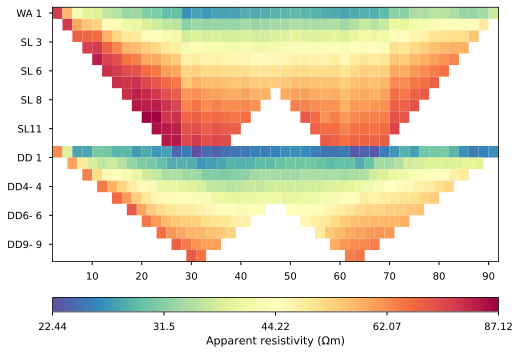

In [4]:
data["k"] = ert.geometricFactors(data)
data["rhoa"] = data["u"] / data["i"] * data["k"]
ert.show(data);

We combined Wenner-Schlumberger (top) and Wenner-beta (bottom) data. The lowest resistivities correspond with the water resistivity of 22.5 $\Omega$m. 

The data are measured standard devitations and should not be used for inversion. Instead, we estimate new errors.

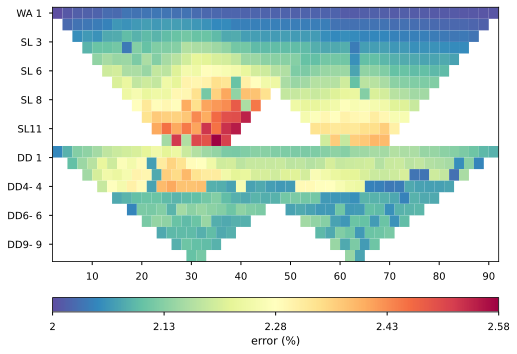

In [5]:
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteUError=100e-6)
pg.show(data, data["err"]*100, label="error (%)");

### Building a mesh with the water body

0 -4.0 0.0
1 -4.0 -20.0
2 97.7452 -20.0
3 97.7452 0.0
4 -13.37452 0.0
5 -13.37452 -29.37452
6 107.11972 0.0
7 107.11972 -29.37452
8 0.0 0.0
9 1.0 0.0
10 2.0 0.0
11 2.993365 -0.11499999999999999


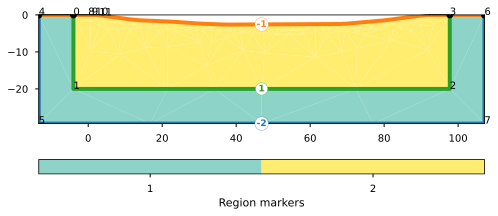

In [6]:
# We create a piece-wise linear complex (PLC) as for a case with topography
import pygimli.meshtools as mt
plc = mt.createParaMeshPLC(data, paraDepth=20, boundary=0.1)
ax, _ = pg.show(plc, markers=True);
for i, n in enumerate(plc.nodes()[:12]):
    ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y())

In [7]:
# So node number 10 is the left one at the shore
for i in range(95, plc.nodeCount()):
    print(i, plc.node(i).x(), plc.node(i).y())

95 86.7804 -0.5833335
96 87.7715 -0.45
97 88.76255 -0.3166665
98 89.75359999999999 -0.183333
99 90.7494 -0.0916665
100 91.7452 0.0
101 92.7452 0.0
102 93.7452 0.0


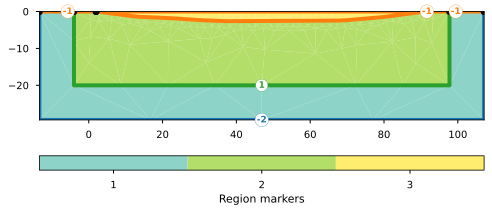

In [8]:
# and 100 the first on the other side. We connect nodes 10 and 100 by an edge
plc.createEdge(plc.node(10), plc.node(100), marker=-1)
plc.addRegionMarker([50, -0.1], marker=3)
pg.show(plc, markers=True);

Region 3 represents the water body and should be treated differently. We expect it to be rather homogeneous, maybe with a slight layering.

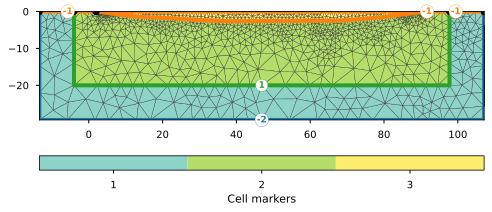

In [9]:
mesh = mt.createMesh(plc, quality=34.4)
pg.show(mesh, markers=True, showMesh=True);

Mesh: Nodes: 1136 Cells: 2103 Boundaries: 3238


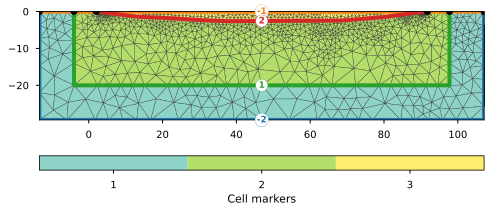

In [10]:
for b in mesh.boundaries():
    if b.marker() == -1 and not b.outside():
        b.setMarker(2)

print(mesh)
pg.show(mesh, markers=True, showMesh=True);

### Inversion with the ERT manager

In [11]:
mgr = ert.ERTManager(data, verbose=True)
mgr.setMesh(mesh)  # use this mesh for all subsequent runs
mgr.invert()
# mgr.invert(mesh=mesh) would only temporally use the mesh

13/12/22 - 16:08:44 - pyGIMLi - INFO - Found 3 regions.
13/12/22 - 16:08:44 - pyGIMLi - INFO - Region with smallest marker (1) set to background
13/12/22 - 16:08:44 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/12/22 - 16:08:44 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.
13/12/22 - 16:08:44 - pyGIMLi - INFO - Use median(data values)=47.19631937576008
13/12/22 - 16:08:44 - pyGIMLi - INFO - Created startmodel from forward operator: 1838 [47.19631937576008,...,47.19631937576008]
13/12/22 - 16:08:44 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002C2A7489E50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002C2A7489680>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002C2A7489DB0>
min/max (data): 22.44/87.12
min/max (error): 2%/2.58%
min/max (start model): 47.2/47.2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 19.5 (dPhi = 66.94%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 7.89 (dPhi = 58.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 5.38 (dPhi = 31.06%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 3.63 (dPhi = 31.47%) lam: 20.0
-------------------------------------------------------

1838 [203.50024987394627,...,96.33076802624814]

The fit is obviously not perfect. So we have a look at data and model response.

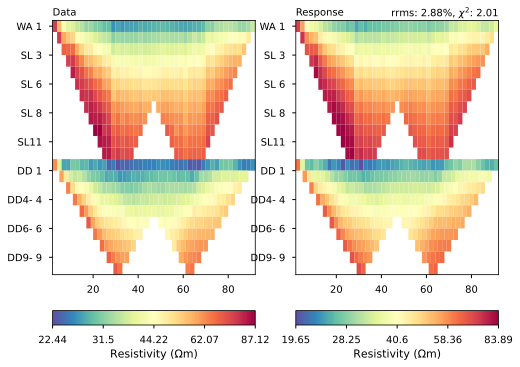

In [12]:
mgr.showFit();

Both look very similar, but let us look at the misfit function in detail.

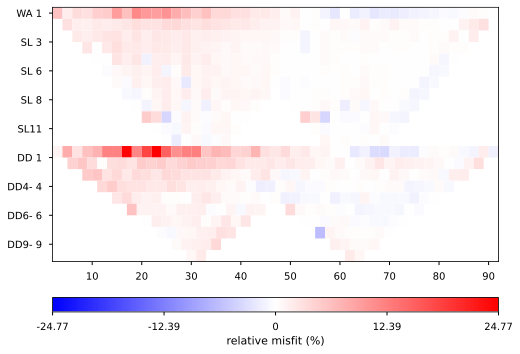

In [13]:
mgr.showMisfit();

There is still systematics in the misfit. Ideally it should be a random distribution of Gaussian noise.

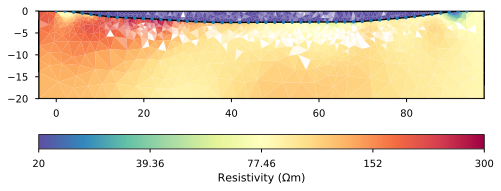

In [14]:
kw = dict(cMin=20, cMax=300, logScale=True, cMap="Spectral_r")
mgr.showResult(**kw);

Apparently, the two regions are already decoupled from each other which makes sense. Let us look in detail at the water cells by extracting the water body.

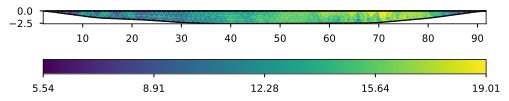

In [15]:
water = mesh.createSubMesh(mesh.cells(mesh.cellMarkers() == 3))
resWater = mgr.model[len(mgr.model)-water.cellCount():]
pg.show(water, resWater);

Apparently, all values are below the expected 22.5$\Omega$m and some are implausibly low. Therefore we should try to limit them.
Moreover, the subsurface structures do not look very "layered", which is why we make the smoothness anisotropic.

13/12/22 - 16:09:13 - pyGIMLi - INFO - Use median(data values)=47.19631937576008
13/12/22 - 16:09:13 - pyGIMLi - INFO - Created startmodel from forward operator: 1838 [47.19631937576008,...,47.19631937576008]
13/12/22 - 16:09:13 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002C2A7489E50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002C2A7489680>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002C2B831DE80>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002C2B831DE80>
min/max (data): 22.44/87.12
min/max (error): 2%/2.58%
min/max (start model): 47.2/47.2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 12.47 (dPhi = 74.61%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 3.15 (dPhi = 74.32%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.96 (dPhi = 68.25%) lam: 20.0


################################################################################
#                  Abo

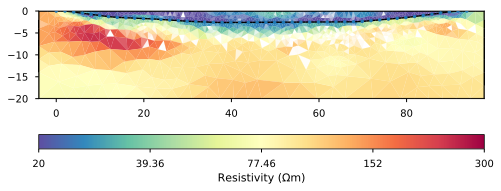

In [16]:
mgr.inv.setRegularization(zWeight=0.1)
mgr.invert()
#mgr.invert(zWeight=0.1)  # only temporarily
mgr.showResult(**kw);

### Region-specific regularization
We first want to limit the resistivity of the water between some plausible bounds around our measurements.

13/12/22 - 16:09:30 - pyGIMLi - INFO - Use median(data values)=47.19631937576008
13/12/22 - 16:09:30 - pyGIMLi - INFO - Created startmodel from forward operator: 1838 [47.19631937576008,...,47.19631937576008]
13/12/22 - 16:09:30 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002C2A7489E50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002C2A7489680>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002C2B831D340>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002C2B831D580>
min/max (data): 22.44/87.12
min/max (error): 2%/2.58%
min/max (start model): 47.2/47.2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 7.11 (dPhi = 88.78%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 0.99 (dPhi = 84.79%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.99)                   #
############################################################################

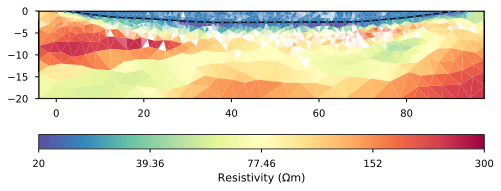

In [17]:
mgr.inv.setRegularization(3, limits=[20, 25], trans="log")
mgr.invert()
mgr.showResult(**kw);

As a result of the log-log transform, we have a homogeneous body but below the lake bottom values below 20, maybe due to clay content or maybe as compensation of limiting the water resistivity too strong. We could limit the subsurface, too.

13/12/22 - 16:09:42 - pyGIMLi - INFO - Use median(data values)=47.19631937576008
13/12/22 - 16:09:42 - pyGIMLi - INFO - Created startmodel from forward operator: 1838 [47.19631937576008,...,47.19631937576008]
13/12/22 - 16:09:42 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002C2A7489E50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002C2A7489680>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002C2A5B8ED00>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002C2A5B8EC40>
min/max (data): 22.44/87.12
min/max (error): 2%/2.58%
min/max (start model): 47.2/47.2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 8.31 (dPhi = 67.62%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.5 (dPhi = 78.96%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.52 (dPhi = 54.09%) lam: 20.0


################################################################################
#                  Abort

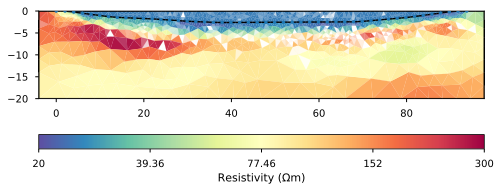

In [18]:
mgr.inv.setRegularization(2, limits=[20, 2000], trans="log")
mgr.invert()
mgr.showResult(**kw);

Apparently, this makes it harder to fit the data accurately. So maybe an increased clay content can be responsible for resistivity below 20$\Omega$m in the mud.

### Model reduction

Another option is to treat the water body as a homogeneous body with only one unknown in the inversion.

13/12/22 - 16:09:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/12/22 - 16:09:58 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.
13/12/22 - 16:09:58 - pyGIMLi - INFO - Use median(data values)=47.19631937576008
13/12/22 - 16:09:58 - pyGIMLi - INFO - Created startmodel from forward operator: 1406 [47.19631937576008,...,47.19631937576008]
13/12/22 - 16:09:58 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002C2A7489E50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002C2A7489680>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002C2B8316640>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002C2B8316A00>
min/max (data): 22.44/87.12
min/max (error): 2%/2.58%
min/max (start model): 47.2/47.2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 9.96 (dPhi = 62.96%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.99 (dPhi = 77.99%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.54 (dPhi = 65.04%) lam: 20.0


################################################################################
#                  Abor

13/12/22 - 16:10:13 - pyGIMLi - ERROR - None.showMesh(C:\Program Files\software\Anaconda\envs\pg13\lib\site-packages\pygimli\viewer\showmesh.py:512)
Coverage needs to be either of type float or an array with the same length as data and mesh.cellCount().


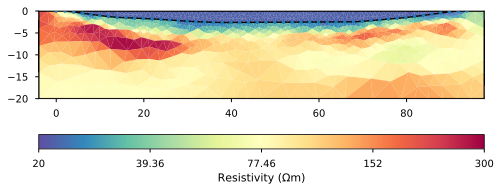

In [19]:
mgr.inv.setRegularization(limits=[0, 0], trans="log")
mgr.inv.setRegularization(3, single=True)
mgr.invert()
mgr.showResult(**kw);

In [20]:
print(mgr.inv.model)
print(min(mgr.model))

1406 [32.27819060945358,...,21.816490726388043]
21.816490726388043


The last value represents the value for the lake and is close to our measured data.

13/12/22 - 16:10:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/12/22 - 16:10:13 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.
13/12/22 - 16:10:13 - pyGIMLi - INFO - Use median(data values)=47.19631937576008
13/12/22 - 16:10:13 - pyGIMLi - INFO - Created startmodel from forward operator: 1405 [47.19631937576008,...,47.19631937576008]
13/12/22 - 16:10:13 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002C2A7489E50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002C2A7489680>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002C2B831DE80>
min/max (data): 22.44/87.12
min/max (error): 2%/2.58%
min/max (start model): 47.2/47.2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 6.15 (dPhi = 67.51%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.24 (dPhi = 77.13%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.51 (dPhi = 47.97%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.51)                   #
######

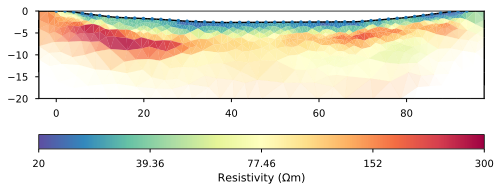

In [21]:
mgr.inv.setRegularization(3, fix=22.5)
mgr.invert()
mgr.showResult(**kw);

13/12/22 - 16:10:27 - pyGIMLi - INFO - Use median(data values)=47.19631937576008
13/12/22 - 16:10:27 - pyGIMLi - INFO - Created startmodel from forward operator: 1405 [47.19631937576008,...,47.19631937576008]
13/12/22 - 16:10:27 - pyGIMLi - INFO - Starting inversion.
13/12/22 - 16:10:29 - pyGIMLi - INFO - Creating GeostatisticConstraintsMatrix for region 2 with: I=[30, 2], dip=0, strike=0


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002C2A7489E50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002C2A7489680>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002C2BCC03640>
min/max (data): 22.44/87.12
min/max (error): 2%/2.58%
min/max (start model): 47.2/47.2
--------------------------------------------------------------------------------


13/12/22 - 16:10:30 - pyGIMLi - INFO - (C) Time for eigenvalue decomposition 0.5s
13/12/22 - 16:10:30 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\2116200224421180444


--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 3.05 (dPhi = 76.37%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 0.6 (dPhi = 76.07%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.60)                   #
################################################################################


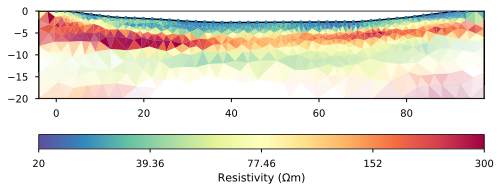

In [22]:
mgr.inv.setRegularization(2, correlationLengths=[30, 2])
mgr.invert()
mgr.showResult(**kw);

We see that the lake does not appear anymore as it is not a part of the inversion mesh `mgr.paraDomain` anymore.

### Region coupling

In case (does not make sense here) the two regions should be coupled to each other, you can set so-called inter-region constraints.

13/12/22 - 16:10:45 - pyGIMLi - INFO - Found 3 regions.
13/12/22 - 16:10:45 - pyGIMLi - INFO - Region with smallest marker (1) set to background
13/12/22 - 16:10:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/12/22 - 16:10:45 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.


3


13/12/22 - 16:10:45 - pyGIMLi - INFO - Use median(data values)=47.19631937576008
13/12/22 - 16:10:45 - pyGIMLi - INFO - Created startmodel from forward operator: 1838 [47.19631937576008,...,47.19631937576008]
13/12/22 - 16:10:45 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002C2B837E450>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002C2B837E4A0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002C2BCE23EE0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002C2BCE23EE0>
min/max (data): 22.44/87.12
min/max (error): 2%/2.58%
min/max (start model): 47.2/47.2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 10.42 (dPhi = 67.95%) lam: 20
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.95 (dPhi = 79.98%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.54 (dPhi = 66.64%) lam: 20.0


################################################################################
#                  Abo

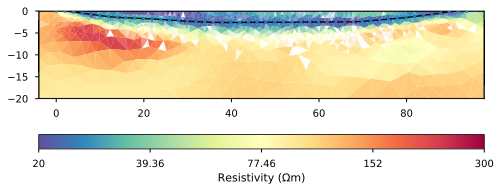

In [23]:
mgr = ert.ERTManager(data, verbose=True)
mgr.setMesh(mesh)
print(mgr.fop.regionManager().regionCount())
mgr.inv.setRegularization(cType=1, zWeight=0.2)
mgr.fop.setInterRegionCoupling(2, 3, 1.0)  # normal coupling
mgr.invert()
mgr.showResult(**kw);

The general image is of course similar, but the structures are mirrored around the lake bottom. Moreover the resistivity in the lake is far too high. Note that all of the obtained images are equivalent with respect to data and errors.

## Take-away messages
* always have a look at the data fit and get hands on data errors
* a lot of different models are able to fit the data, particularly in the full space
* regions can be very specifically controlled
* constrain or fix whenever possibly (and reliable)
* sometimes geostatistic constraints outperform classical smoothness but sometimes not
* play with regularization and keep looking at data fit